In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

In [ ]:
sheets = {
    '2016': '2016_Summary_Commodity',
    '2015': '2015_Summary_Commodity',
    '2014': '2014_Summary_Commodity',
    '2013': '2013_Summary_Commodity',
    '2012': '2012_Summary_Commodity',
    '2011': '2011_Summary_Commodity',
    '2010': '2010_Summary_Commodity'
}

In [40]:
def load_and_clean_data(sheet_name):
    df = pd.read_excel('SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx', sheet_name=sheet_name)
    numeric_cols = ['Supply Chain Emission Factors without Margins', 
                    'Margins of Supply Chain Emission Factors', 
                    'Supply Chain Emission Factors with Margins']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    df = df[df['Supply Chain Emission Factors with Margins'] > 0]    
    return df
df_2016 = load_and_clean_data(sheets['2016'])

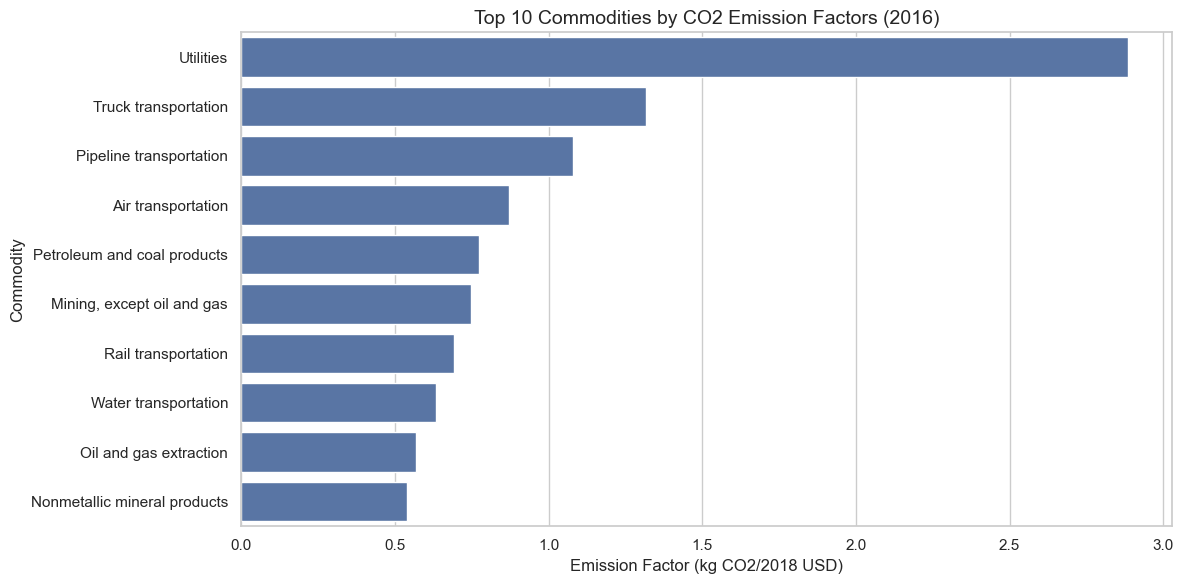

In [42]:
co2_data = df_2016[df_2016['Substance'] == 'carbon dioxide'].sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=co2_data, x='Supply Chain Emission Factors with Margins', y='Commodity Name')
plt.title('Top 10 Commodities by CO2 Emission Factors (2016)', fontsize=14)
plt.xlabel('Emission Factor (kg CO2/2018 USD)', fontsize=12)
plt.ylabel('Commodity', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

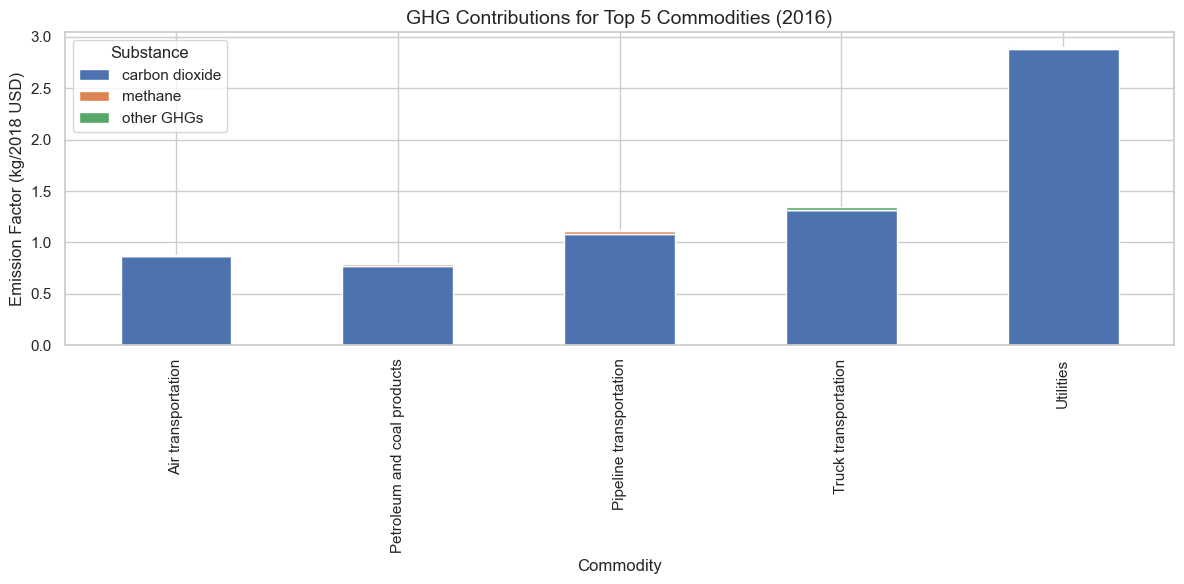

In [44]:
top_commodities = df_2016[df_2016['Substance'] == 'carbon dioxide'].sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(5)['Commodity Name'].tolist()

ghg_data = df_2016[df_2016['Commodity Name'].isin(top_commodities)]
pivot_data = ghg_data.pivot_table(
    values='Supply Chain Emission Factors with Margins',
    index='Commodity Name',
    columns='Substance',
    fill_value=0
)

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('GHG Contributions for Top 5 Commodities (2016)', fontsize=14)
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Emission Factor (kg/2018 USD)', fontsize=12)
plt.legend(title='Substance')
plt.tight_layout()
plt.show()

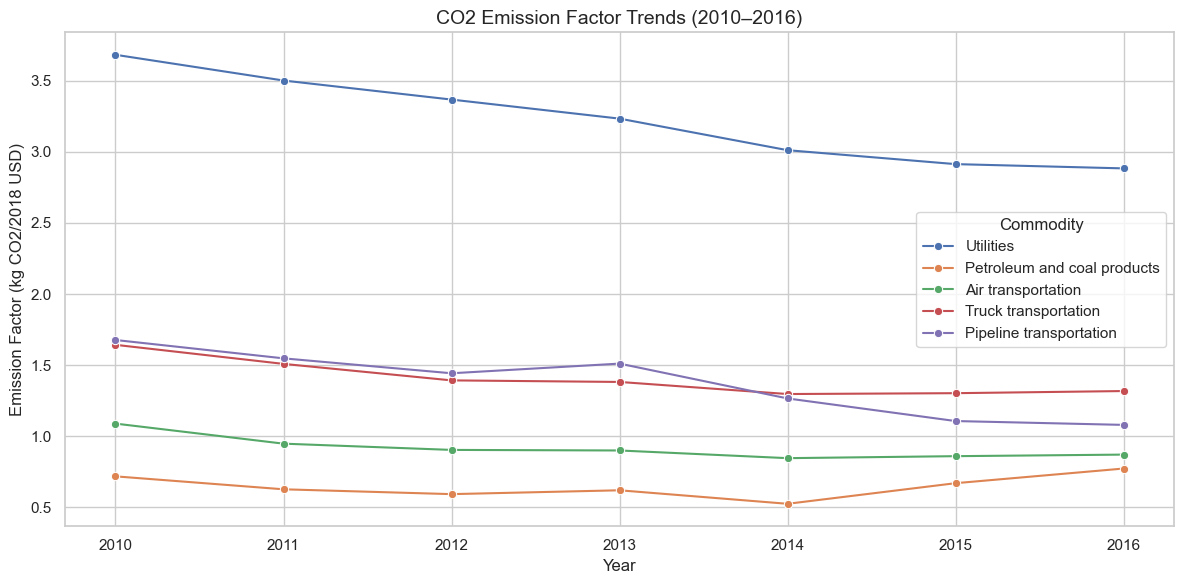

In [32]:
# Line plot of CO2 emission trends (2010–2016)
top_commodities = df_2016[df_2016['Substance'] == 'carbon dioxide'].sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(5)['Commodity Name'].tolist()

trend_data = []
for year, sheet in sheets.items():
    df_year = load_and_clean_data(sheet)
    df_year = df_year[
        (df_year['Commodity Name'].isin(top_commodities)) & 
        (df_year['Substance'] == 'carbon dioxide')
    ][['Commodity Name', 'Supply Chain Emission Factors with Margins']]
    df_year['Year'] = int(year)
    trend_data.append(df_year)

trend_df = pd.concat(trend_data)

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Commodity Name', marker='o')
plt.title('CO2 Emission Factor Trends (2010–2016)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emission Factor (kg CO2/2018 USD)', fontsize=12)
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

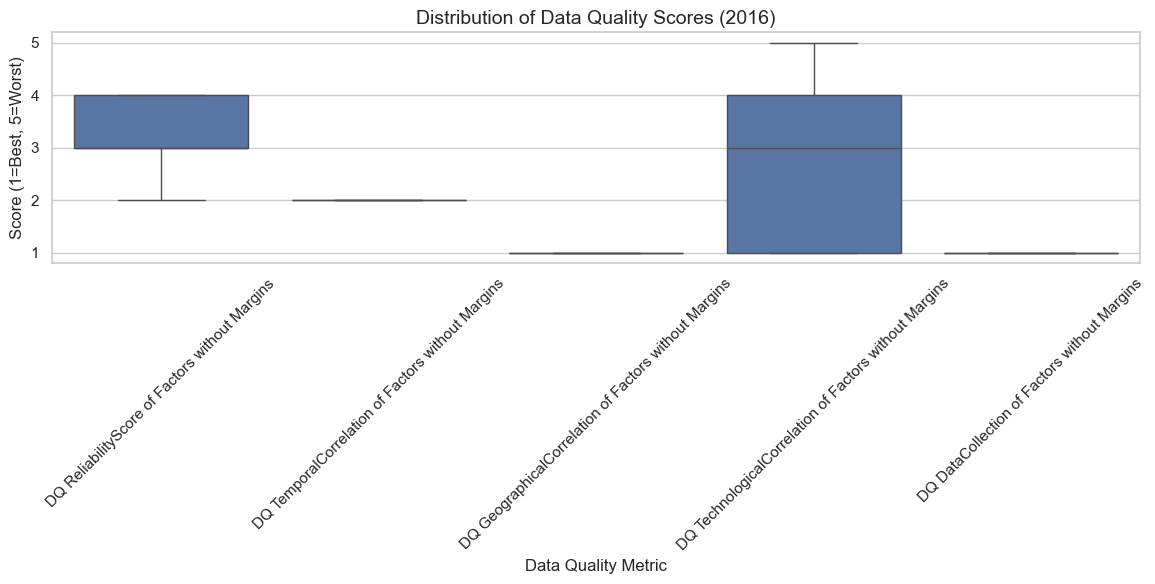

In [34]:
dq_cols = [
    'DQ ReliabilityScore of Factors without Margins',
    'DQ TemporalCorrelation of Factors without Margins',
    'DQ GeographicalCorrelation of Factors without Margins',
    'DQ TechnologicalCorrelation of Factors without Margins',
    'DQ DataCollection of Factors without Margins'
]
dq_data = df_2016[dq_cols].melt(var_name='DQ Metric', value_name='Score')
dq_data['Score'] = pd.to_numeric(dq_data['Score'], errors='coerce').fillna(0)

plt.figure(figsize=(12, 6))
sns.boxplot(data=dq_data, x='DQ Metric', y='Score')
plt.title('Distribution of Data Quality Scores (2016)', fontsize=14)
plt.xlabel('Data Quality Metric', fontsize=12)
plt.ylabel('Score (1=Best, 5=Worst)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()